In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord
import random
import numpy as np

# #--- plot parameters --- 
# plt.rcParams["figure.figsize"] = (15,10)
# plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({'font.size': 18})
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['axes.labelsize'] = 30
# hfont = {'fontname':'Helvetica'}

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)


In [9]:
data_main = pd.read_csv('data/Simultaneous_SETI_TESS_targets_170621.csv', index_col = 'Name')

observed_target_names = np.loadtxt("""data\observed_targets.dat""", dtype=str)
observed_targets_df = data_main.loc[observed_target_names]
# observed_targets_df = observed_targets_df['RA']*15

for i in range(len(observed_targets_df)):     
        data_main = data_main[data_main.index != observed_target_names[i]]   


observed_targets_df.to_csv('data/dual-site-observations-masterlist.csv')

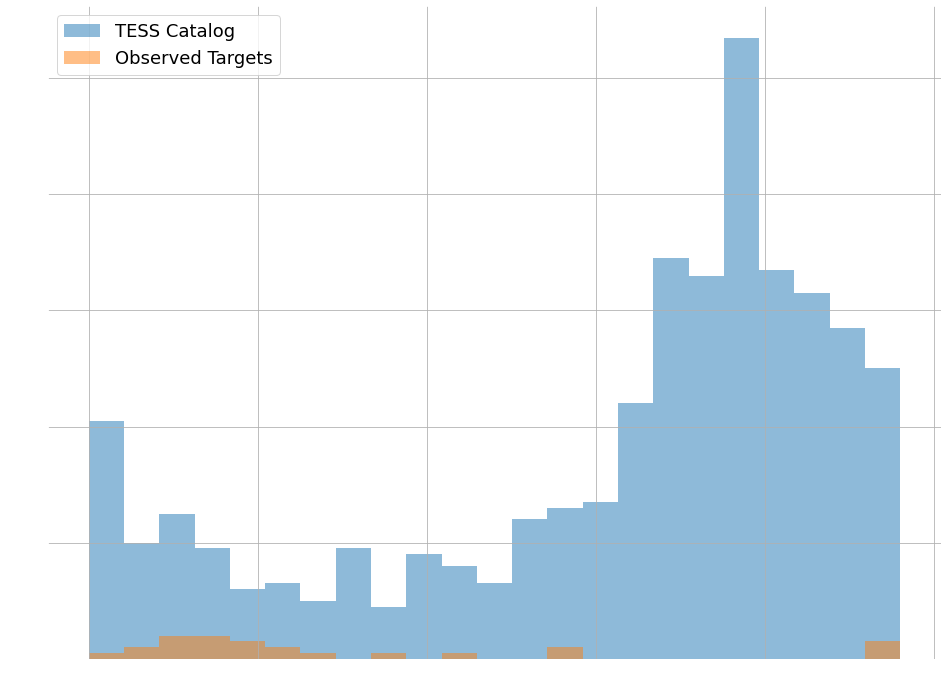

In [10]:
bins = np.linspace(0, 24, 24)

plt.figure(figsize=(16, 12))
plt.hist(data_main['RA'], bins, alpha=0.5, label='TESS Catalog')
plt.hist(observed_targets_df['RA'], bins, alpha=0.5, label='Observed Targets')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [4]:
# data = ascii.read('data/Simultaneous_SETI_TESS_targets_170621.csv', header_start=0, data_start=1)
# data

24 24


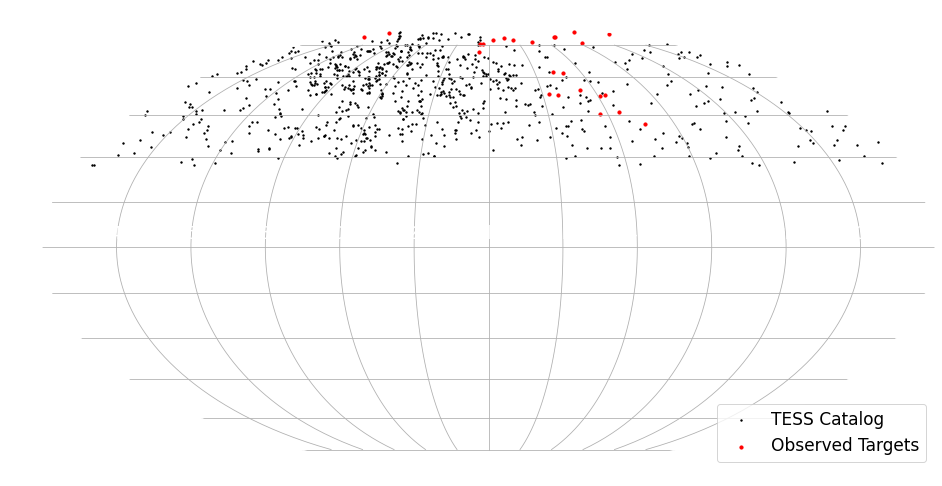

In [14]:
ra = coord.Angle(15*data_main['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data_main['DEC']*u.degree)

ora = coord.Angle(15*observed_targets_df['RA']*u.degree)
ora = ora.wrap_at(180*u.degree)
odec = coord.Angle(observed_targets_df['DEC']*u.degree)

print(len(ora), len(odec))

plt.rcParams.update({'font.size': 17})
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, color = 'black', s = 1.9, label = 'TESS Catalog')
ax.scatter(ora.radian, odec.radian, color = 'red', s = 10, label = 'Observed Targets')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid()
plt.title("Molleide Projection of Successful Dual-site Observations", fontsize = 14, color = 'w')
plt.legend(loc = 'lower right')